In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:

# Load the Penguins dataset
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
data = pd.read_csv(url)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# Data pre-processing

# Filter data for two species (Adelie and Gentoo)
data = data[data['species'].isin(['Adelie', 'Gentoo'])]

# Handle missing values
data = data.dropna()

# Encode species labels
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

# Select features and target
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']


Naive Bayes - Training Accuracy: 1.0
Naive Bayes - Test Accuracy: 1.0
Logistic Regression - Training Accuracy: 1.0
Logistic Regression - Test Accuracy: 1.0
Naive Bayes - Training AUC: 1.0
Naive Bayes - Test AUC: 1.0
Logistic Regression - Training AUC: 1.0
Logistic Regression - Test AUC: 1.0


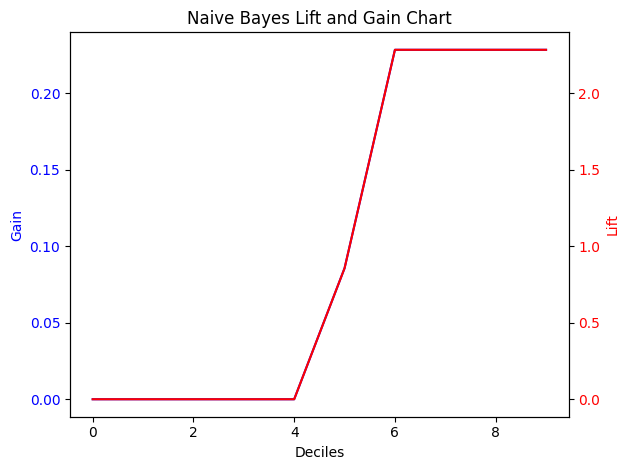

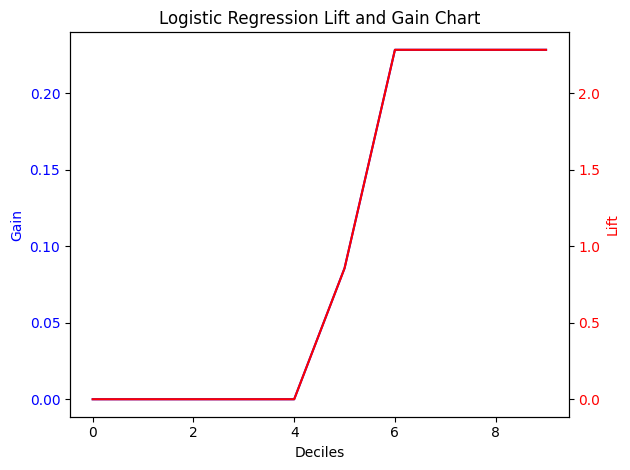


Model Comparison:
Naive Bayes - Test Accuracy: 1.0 Test AUC: 1.0
Logistic Regression - Test Accuracy: 1.0 Test AUC: 1.0
Both models perform similarly. Consider other metrics or domain-specific requirements.


In [5]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate accuracy
nb_train_accuracy = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

lr_train_accuracy = accuracy_score(y_train, lr_model.predict(X_train))
lr_test_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

print("Naive Bayes - Training Accuracy:", nb_train_accuracy)
print("Naive Bayes - Test Accuracy:", nb_test_accuracy)
print("Logistic Regression - Training Accuracy:", lr_train_accuracy)
print("Logistic Regression - Test Accuracy:", lr_test_accuracy)

# Calculate AUC for both models
nb_train_auc = roc_auc_score(y_train, nb_model.predict_proba(X_train)[:, 1])
nb_test_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])

lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:, 1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

print("Naive Bayes - Training AUC:", nb_train_auc)
print("Naive Bayes - Test AUC:", nb_test_auc)
print("Logistic Regression - Training AUC:", lr_train_auc)
print("Logistic Regression - Test AUC:", lr_test_auc)

# Generate Lift and Gain charts
def lift_gain_chart(y_true, y_pred_proba, title):
    df = pd.DataFrame({'true': y_true, 'pred': y_pred_proba})
    df = df.sort_values(by='pred', ascending=False)
    df['decile'] = pd.qcut(df['pred'], q=10, labels=False, duplicates='drop')

    lift_gain = df.groupby('decile').agg(
        gain=('true', lambda x: x.sum() / df['true'].sum()),
        lift=('true', lambda x: (x.sum() / len(x)) / (df['true'].sum() / len(df)))
    ).reset_index()

    fig, ax1 = plt.subplots()
    ax1.plot(lift_gain['decile'], lift_gain['gain'], color='b', label='Gain')
    ax1.set_xlabel('Deciles')
    ax1.set_ylabel('Gain', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(lift_gain['decile'], lift_gain['lift'], color='r', label='Lift')
    ax2.set_ylabel('Lift', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    plt.title(title)
    fig.tight_layout()
    plt.show()

# Lift and Gain for Naive Bayes
lift_gain_chart(y_test, nb_model.predict_proba(X_test)[:, 1], "Naive Bayes Lift and Gain Chart")

# Lift and Gain for Logistic Regression
lift_gain_chart(y_test, lr_model.predict_proba(X_test)[:, 1], "Logistic Regression Lift and Gain Chart")

# Compare overall performance
print("\nModel Comparison:")
print("Naive Bayes - Test Accuracy:", nb_test_accuracy, "Test AUC:", nb_test_auc)
print("Logistic Regression - Test Accuracy:", lr_test_accuracy, "Test AUC:", lr_test_auc)

if nb_test_accuracy > lr_test_accuracy and nb_test_auc > lr_test_auc:
    print("Naive Bayes performs better in classifying the two penguin species.")
elif lr_test_accuracy > nb_test_accuracy and lr_test_auc > nb_test_auc:
    print("Logistic Regression performs better in classifying the two penguin species.")
else:
    print("Both models perform similarly. Consider other metrics or domain-specific requirements.")